# Lab | Comparing regression models

## Import the necessary libraries

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [5]:
customer_df = pd.read_csv('/Users/Hector_Martin/Documents/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Standardizing the columns:

In [6]:
def standardize_cols (df):
    cols = []
    for column in df.columns:
        cols.append(column.lower().replace(' ','_'))#fill in the list with all column names in lowercase
    df.columns = cols#replace the dataframe columns with the columns stored in the list
    
    return df

In [7]:
customer_df = standardize_cols(customer_df)
display(customer_df.head(5))

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [8]:
customer_df = customer_df.drop(['customer'], axis =1)

In [9]:
customer_df.head(5)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Splitting Numerical columns between Continuous and Discrete

In order to identify Outliers and take care of them, first of all we have to identify the **Continuous Numerical** columns. We will split those into 2 different DataFrames.

In [10]:
def num_cont_disc (df, num_uniques):
    
    df2 = df.select_dtypes(include = np.number)
    
    df_disc = df2.loc[:,df.nunique() < num_uniques] 
    df_cont = df2.loc[:,df.nunique() > num_uniques]

    return df_disc, df_cont

As mentioned in the cleaning_numerical_data lab, we are going to set a threshold in which any column exceeding 100 unique values per column will be considered Continous.

In [11]:
df_disc, df_cont = num_cont_disc(customer_df, 100)

In [12]:
display(df_disc.head(5))
display(df_cont.head(5))

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


### Checking the distribution of each Numerical Continuous column in seach of outliers

Now that we have the 2 separate DataFrames per each kind of Numerical variable, we will check the distribution of all the **Continuous** ones

#### Distribution Plots:

In [13]:
def plot_num (df):
    cols =[]
    df2 = df.select_dtypes(include = np.number)
    for column in df2.columns:
        cols.append(column)   
        sns.displot(df2[cols]);
        plt.show()
        cols.pop()

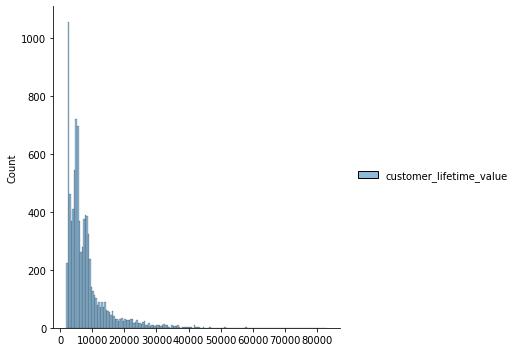

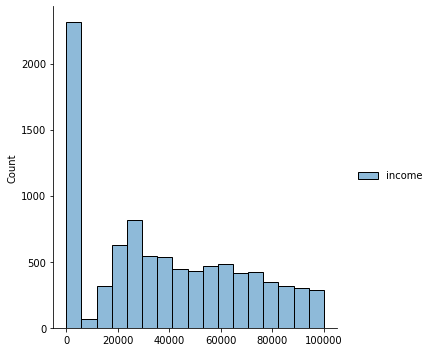

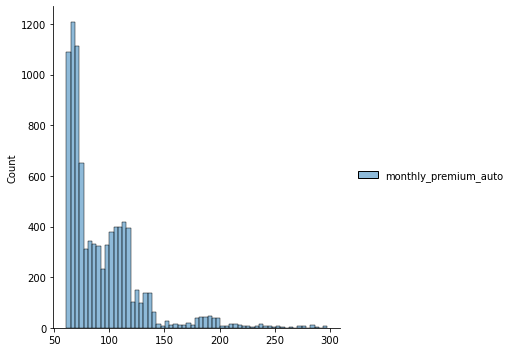

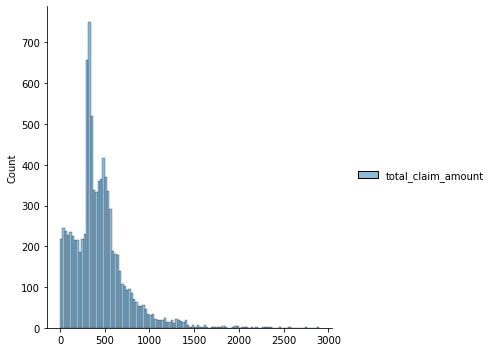

In [14]:
plot_num(df_cont)

So far, we can see Outliers on 'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount'. Let's explore deeper by using Boxplots.

#### Boxplots:

In [15]:
def boxplotting (df):
    cols = []
    df2 = df.select_dtypes(include = np.number)
    for column in df2.columns:
        cols.append(column)
    for col in cols:
        sns.boxplot(x = df2[col])
        plt.show()

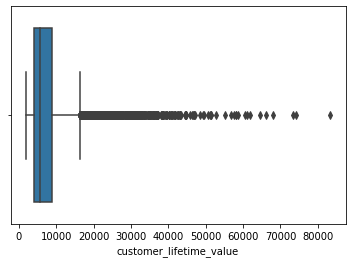

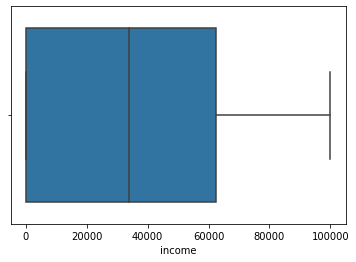

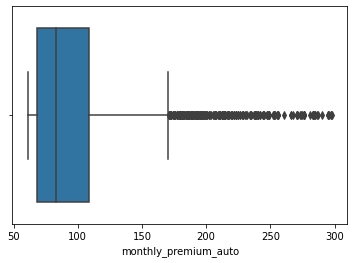

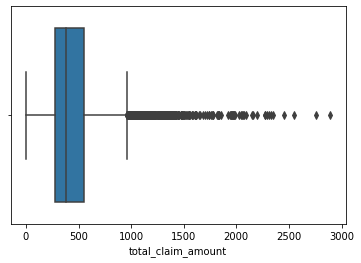

In [16]:
boxplotting(df_cont)

We can confirm that there are outliers in the aforementioned columns, we will remove these now.

### Removing Outliers:

In [17]:
#Let's create a list of the columns with Outliers to remove:
cols = ['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount']

In [18]:
def outliers_out(df, columns):
 
    df2 = df.copy()
    i = 0

    for col in columns:
        iqr = np.percentile(df2[columns[i]],75) - np.percentile(df2[columns[i]],25)
        upper_limit = np.percentile(df2[columns[i]],75) + 1.5*iqr
        lower_limit = np.percentile(df2[columns[i]],25) - 1.5*iqr
        df2 = df2[(df2[columns[i]]>lower_limit) & (df2[columns[i]]<upper_limit)]
        sns.displot(df2[columns[i]])
        
        i+=1
        
    plt.show()
    return df2

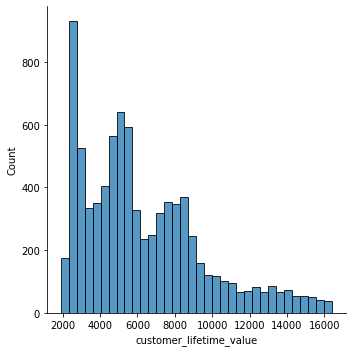

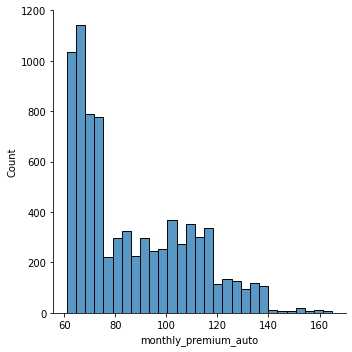

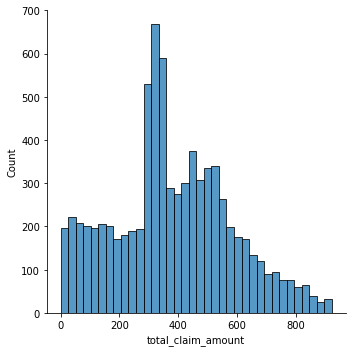

In [19]:
customer_df = outliers_out(customer_df, cols)

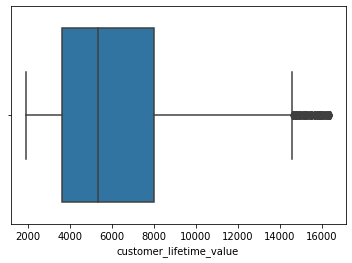

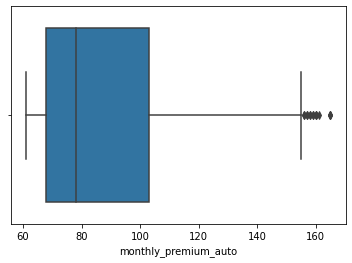

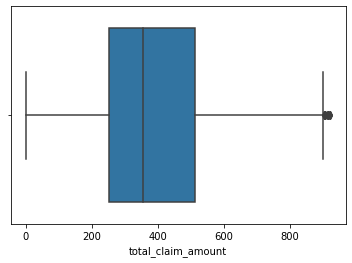

In [20]:
for col in cols:
    sns.boxplot(x = customer_df[col])
    plt.show()

We can definitely see that the number of outliers has been drastically reduced.

### X - y Split:

In [21]:
X = customer_df.drop(['total_claim_amount'], axis =1)
y = customer_df[['total_claim_amount']]

In [22]:
X.shape

(7789, 22)

### Train-Test Split:

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [24]:
#Transform NUMPY ARRAYS into dataframes

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

In [25]:
#split the data into NUMERICAL and CATEGORICAL after the test split, most correct approach

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = object)
X_test_cat  = X_test_df.select_dtypes(include = object)

### Create a copy of the dataframe for the data wrangling.

In [26]:
X_train_num_copy = X_train_num.copy()
X_train_cat_copy = X_train_cat.copy()
X_test_num_copy = X_test_num.copy()
X_test_cat_copy = X_test_cat.copy()

### Normalize the Continuous variables. You can use any one method you want.

#### Splitting X_train and X_test between **Continuous** and **Discrete** variables

In [27]:
#X_train:
X_train_num_disc, X_train_num_cont = num_cont_disc(X_train_num_copy, 100)

print('DataFrames for X_train:')
print('-----------------------\n')
display(X_train_num_disc.head(5))
display(X_train_num_cont.head(5))

#X_test:

print('DataFrames for X_test:')
print('\n-----------------------\n')
X_test_num_disc, X_test_num_cont = num_cont_disc(X_test_num_copy, 100)


display(X_test_num_disc)
display(X_test_num_cont)

DataFrames for X_train:
-----------------------



,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies
3167,104,13,0,3
8264,105,31,0,5
2595,76,20,0,6
2047,101,4,0,3
674,70,18,0,1


,customer_lifetime_value,income
3167,7521.194691,0
8264,7376.795372,0
2595,5775.517825,0
2047,7695.122957,50147
674,2520.123180,0


DataFrames for X_test:

-----------------------



,monthly_premium_auto,months_since_last_claim,number_of_open_complaints,number_of_policies
942,62,8,0,1
334,70,17,1,5
6139,69,2,0,1
5356,93,4,0,1
2442,61,16,0,1
...,...,...,...,...
8566,88,0,0,2
3928,65,1,0,2
2901,67,24,0,8
124,63,17,0,1


,customer_lifetime_value,income
942,2504.907557,88264
334,5536.386959,52220
6139,2443.925701,0
5356,3500.855508,0
2442,2280.386988,0
...,...,...
8566,10144.309400,27231
3928,6707.994148,0
2901,5229.741907,77357
124,2509.107875,33555


#### Using Standard Scaler for normalization:

In [28]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(X_train_num_cont.values)

#X_train:
X_train_standardized = stdscaler.transform(X_train_num_cont.values)
X_train_standardized_df =pd.DataFrame(X_train_standardized, columns= X_train_num_cont.columns, index = X_train_num_cont.index)
print('DataFrame for X_train:')
print('-----------------------\n')
display(X_train_standardized_df)

#X_test:
X_test_standardized = stdscaler.transform(X_test_num_cont.values)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns= X_test_num_cont.columns, index = X_test_num_cont.index)
print('DataFrame for X_test:')
print('-----------------------\n')
display(X_test_standardized_df)


DataFrame for X_train:
-----------------------



,customer_lifetime_value,income
3167,0.462809,-1.279498
8264,0.416438,-1.279498
2595,-0.097777,-1.279498
2047,0.518662,0.387484
674,-1.143174,-1.279498
...,...,...
1571,-0.498048,0.885680
4499,1.775919,0.100141
6140,2.229954,-1.279498
5026,-1.155353,-0.245907


DataFrame for X_test:
-----------------------



,customer_lifetime_value,income
942,-1.148060,1.654565
334,-0.174568,0.456394
6139,-1.167643,-1.279498
5356,-0.828234,-1.279498
2442,-1.220160,-1.279498
...,...,...
8566,1.305163,-0.374288
3928,0.201667,-1.279498
2901,-0.273040,1.291995
124,-1.146711,-0.164066


### Encode the categorical variables:

Since we have some alphanumerical columns that express an implicit order within their values we are going to use 2 different encoding methods:

- **Ordinal Encoder** for Categorical Ordinal variables
- **One Hot Encoder** for Categorical Nominal ones

#### Categorical Ordinal and Nominal Split:

In [29]:
#X_train:

X_train_cat_nom = X_train_cat.drop(['coverage', 'employmentstatus', 'location_code', 'vehicle_size', 'effective_to_date'], axis = 1)

X_train_cat_ord = X_train_cat.drop(['state', 'response', 'education',
       'gender', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class','effective_to_date'],  axis = 1)

#X_test:

X_test_cat_nom = X_test_cat.drop(['coverage', 'employmentstatus', 'location_code', 'vehicle_size', 'effective_to_date'], axis = 1)

X_test_cat_ord = X_test_cat.drop(['state', 'response', 'education',
       'gender', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'effective_to_date'],  axis = 1)

In [30]:
print('DataFrames for X_train:')
print('-----------------------\n')
display(X_train_cat_nom.head(5))
display(X_train_cat_ord.head(5))

print('DataFrames for X_test:')
print('-----------------------\n')
display(X_test_cat_nom.head(5))
display(X_test_cat_ord.head(5))

DataFrames for X_train:
-----------------------



,state,response,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
3167,Oregon,No,College,M,Married,Personal Auto,Personal L3,Offer1,Branch,Four-Door Car
8264,California,No,Bachelor,M,Single,Corporate Auto,Corporate L1,Offer2,Agent,SUV
2595,Washington,No,High School or Below,F,Single,Personal Auto,Personal L1,Offer3,Call Center,Two-Door Car
2047,California,No,Bachelor,M,Single,Personal Auto,Personal L2,Offer1,Branch,SUV
674,Oregon,No,College,M,Married,Corporate Auto,Corporate L1,Offer2,Agent,Four-Door Car


,coverage,employmentstatus,location_code,vehicle_size
3167,Premium,Unemployed,Suburban,Small
8264,Basic,Unemployed,Suburban,Medsize
2595,Extended,Unemployed,Suburban,Small
2047,Basic,Employed,Suburban,Medsize
674,Basic,Unemployed,Rural,Medsize


DataFrames for X_test:
-----------------------



,state,response,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
942,Washington,No,High School or Below,M,Married,Personal Auto,Personal L3,Offer1,Branch,Two-Door Car
334,Arizona,No,College,F,Married,Personal Auto,Personal L2,Offer1,Call Center,Four-Door Car
6139,California,No,College,M,Married,Personal Auto,Personal L2,Offer2,Branch,Four-Door Car
5356,Oregon,No,High School or Below,F,Married,Personal Auto,Personal L2,Offer4,Branch,Two-Door Car
2442,Arizona,No,College,F,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car


,coverage,employmentstatus,location_code,vehicle_size
942,Basic,Employed,Suburban,Medsize
334,Basic,Employed,Suburban,Small
6139,Basic,Unemployed,Rural,Medsize
5356,Extended,Unemployed,Suburban,Small
2442,Basic,Unemployed,Urban,Medsize


##### Ordinal Encoding:

In [31]:
#X_train:

#Vehicle Size:

mapping = {'Small':0,'Medsize':1, 'Large':2}
X_train_cat_ord = X_train_cat_ord.replace({'vehicle_size': mapping})

#Coverage:

mapping2 = {'Basic':0,'Extended':1, 'Premium':2}
X_train_cat_ord = X_train_cat_ord.replace({'coverage': mapping2})

#Employment Status:

mapping3 = {'Disabled':0,'Unemployed':1, 'Employed':2, 'Medical Leave':3, 'Retired': 4}
X_train_cat_ord = X_train_cat_ord.replace({'employmentstatus': mapping3})

#Location code:

mapping4 = {'Urban':0,'Suburban':1, 'Rural':2}
X_train_cat_ord = X_train_cat_ord.replace({'location_code': mapping4})

print('DataFrames for X_train:')
print('-----------------------\n')
display(X_train_cat_ord.head())

#X_test:

#Vehicle Size:

mapping5 = {'Small':0,'Medsize':1, 'Large':2}
X_test_cat_ord = X_test_cat_ord.replace({'vehicle_size': mapping5})

#Coverage:

mapping6 = {'Basic':0,'Extended':1, 'Premium':2}
X_test_cat_ord = X_test_cat_ord.replace({'coverage': mapping6})

#Employment Status:

mapping7 = {'Disabled':0,'Unemployed':1, 'Employed':2, 'Medical Leave':3, 'Retired': 4}
X_test_cat_ord = X_test_cat_ord.replace({'employmentstatus': mapping7})

#Location code:

mapping8 = {'Urban':0,'Suburban':1, 'Rural':2}
X_test_cat_ord = X_test_cat_ord.replace({'location_code': mapping8})

print('DataFrames for X_test:')
print('-----------------------\n')
display(X_test_cat_ord.head())

DataFrames for X_train:
-----------------------



,coverage,employmentstatus,location_code,vehicle_size
3167,2,1,1,0
8264,0,1,1,1
2595,1,1,1,0
2047,0,2,1,1
674,0,1,2,1


DataFrames for X_test:
-----------------------



,coverage,employmentstatus,location_code,vehicle_size
942,0,2,1,1
334,0,2,1,0
6139,0,1,2,1
5356,1,1,1,0
2442,0,1,0,1


Creating a **list of lists** of Unique values for each **Categorical Nominal** columns

In [32]:
categories = [list(customer_df[col].unique()) for col in X_train_cat_nom.columns]
categories

[['Washington', 'Nevada', 'California', 'Oregon', 'Arizona'],
 ['No', 'Yes'],
 ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
 ['F', 'M'],
 ['Married', 'Single', 'Divorced'],
 ['Corporate Auto', 'Personal Auto', 'Special Auto'],
 ['Corporate L3',
  'Personal L3',
  'Corporate L2',
  'Personal L1',
  'Special L2',
  'Corporate L1',
  'Personal L2',
  'Special L1',
  'Special L3'],
 ['Offer1', 'Offer2', 'Offer4', 'Offer3'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'SUV', 'Four-Door Car', 'Sports Car']]

##### One Hot Encoder:

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = categories) 
encoder.fit(X_train_cat_nom.values)

#X_train:
X_train_cat_encoded = encoder.transform(X_train_cat_nom.values).toarray()
cols_train = encoder.get_feature_names_out(input_features=X_train_cat_nom.columns)
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols_train, index = X_train_cat_nom.index)
print('DataFrame for X_train:')
print('-----------------------\n')
display(X_train_cat_encoded_df.head())

#X_test:
X_test_cat_encoded = encoder.transform(X_test_cat_nom.values).toarray()
cols_test = encoder.get_feature_names_out(input_features=X_test_cat_nom.columns)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=cols_test, index = X_test_cat_nom.index)
print('DataFrame for X_test:')
print('-----------------------\n')
display(X_test_cat_encoded_df.head())

DataFrame for X_train:
-----------------------



,state_Nevada,state_California,state_Oregon,state_Arizona,response_Yes,education_College,education_Master,education_High School or Below,education_Doctor,gender_M,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer4,renew_offer_type_Offer3,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_SUV,vehicle_class_Four-Door Car,vehicle_class_Sports Car
3167,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8264,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2047,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
674,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


DataFrame for X_test:
-----------------------



,state_Nevada,state_California,state_Oregon,state_Arizona,response_Yes,education_College,education_Master,education_High School or Below,education_Doctor,gender_M,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer4,renew_offer_type_Offer3,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,vehicle_class_SUV,vehicle_class_Four-Door Car,vehicle_class_Sports Car
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
334,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6139,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5356,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2442,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

We are going to extract the **days of the week** and the **months** appearing in each date for **Calendar effects**, doing this could be useful if we wanted to investigate if we wanted to make predictions based on certain days of the week, months, quarters or seasons.

#### Making copies of the time variable in independent DataFrames

In [34]:
X_train_time = X_train[['effective_to_date']].copy()
X_test_time = X_test[['effective_to_date']].copy()

#### Converting the variable into a Time one

In [35]:
from datetime import datetime

X_train_time['effective_to_date'] = pd.to_datetime(X_train_time['effective_to_date'], errors = 'coerce')
X_test_time['effective_to_date'] = pd.to_datetime(X_test_time['effective_to_date'], errors = 'coerce')

#### Creating an additional column with the respective day of the week per date

In [36]:
X_train_time['day_of_week'] = X_train_time['effective_to_date'].dt.day_of_week
X_test_time['day_of_week'] = X_test_time['effective_to_date'].dt.day_of_week

#### Creating an additional column with the respective month

In [37]:
X_train_time['month'] = X_train_time['effective_to_date'].dt.month
X_test_time['month'] = X_test_time['effective_to_date'].dt.month

print('DataFrame for X_train:')
print('-----------------------\n')
display(X_train_time)
print('DataFrame for X_test:')
print('-----------------------\n')
display(X_test_time)

DataFrame for X_train:
-----------------------



,effective_to_date,day_of_week,month
3167,2011-02-14,0,2
8264,2011-02-22,1,2
2595,2011-02-25,4,2
2047,2011-01-24,0,1
674,2011-01-15,5,1
...,...,...,...
1571,2011-02-18,4,2
4499,2011-01-01,5,1
6140,2011-01-31,0,1
5026,2011-01-31,0,1


DataFrame for X_test:
-----------------------



,effective_to_date,day_of_week,month
942,2011-02-27,6,2
334,2011-01-07,4,1
6139,2011-02-12,5,2
5356,2011-02-26,5,2
2442,2011-02-19,5,2
...,...,...,...
8566,2011-01-29,5,1
3928,2011-02-25,4,2
2901,2011-02-27,6,2
124,2011-02-16,2,2


#### Removing the 'effective_to_date column' 

Since we already got our dates translated into months and days of the week this column is no longer relevant to us.

In [38]:
X_train_time = X_train_time.drop(['effective_to_date'], axis = 1)
X_test_time = X_test_time.drop(['effective_to_date'], axis = 1)

### Concatenating all the DataFrames for both X_train and X_test:

In [39]:
X_train_final = pd.concat([X_train_time, X_train_num_disc, X_train_cat_encoded_df, X_train_cat_ord, X_train_standardized_df], axis =1)
X_test_final = pd.concat([X_test_time, X_test_num_disc, X_test_cat_encoded_df, X_test_cat_ord, X_test_standardized_df], axis =1)

#### Checking for NaNs after concatenation:

In [40]:
print(X_train_final.isna().sum())
print('\n-------------------------\n')
print(X_test_final.isna().sum())

day_of_week                       0
month                             0
monthly_premium_auto              0
months_since_last_claim           0
number_of_open_complaints         0
number_of_policies                0
state_Nevada                      0
state_California                  0
state_Oregon                      0
state_Arizona                     0
response_Yes                      0
education_College                 0
education_Master                  0
education_High School or Below    0
education_Doctor                  0
gender_M                          0
marital_status_Single             0
marital_status_Divorced           0
policy_type_Personal Auto         0
policy_type_Special Auto          0
policy_Personal L3                0
policy_Corporate L2               0
policy_Personal L1                0
policy_Special L2                 0
policy_Corporate L1               0
policy_Personal L2                0
policy_Special L1                 0
policy_Special L3           

We can see that that there are no NaNs after concatenating everything.

### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [41]:
print(X_train_final.dtypes)
print('\n---------------------\n')
print(X_test_final.dtypes)

day_of_week                         int64
month                               int64
monthly_premium_auto                int64
months_since_last_claim             int64
number_of_open_complaints           int64
number_of_policies                  int64
state_Nevada                      float64
state_California                  float64
state_Oregon                      float64
state_Arizona                     float64
response_Yes                      float64
education_College                 float64
education_Master                  float64
education_High School or Below    float64
education_Doctor                  float64
gender_M                          float64
marital_status_Single             float64
marital_status_Divorced           float64
policy_type_Personal Auto         float64
policy_type_Special Auto          float64
policy_Personal L3                float64
policy_Corporate L2               float64
policy_Personal L1                float64
policy_Special L2                 

## Try a simple linear regression with all the data to see whether we are getting good results.

### Defining the Linear Model 

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### Fitting the model and getting the predictions

In [43]:
lr.fit(X_train_final,y_train)
y_pred_train = lr.predict(X_train_final)
y_pred_test = lr.predict(X_test_final)

### Assessing the performance of our model

In [44]:
def reg_performance (y_train, y_pred_train, y_test, y_pred_test):
    
    '''
    Measures the performance of a single Regression Model.
    '''

    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    ME_train = round(np.mean(y_train.values - y_pred_train),2)
    ME_test  = round(np.mean(y_test.values - y_pred_test),2)

    MAE_train = round(mean_absolute_error(y_train.values,y_pred_train),2)
    MAE_test  = round(mean_absolute_error(y_test.values,y_pred_test),2)

    MSE_train = round(mean_squared_error(y_train.values,y_pred_train),2)
    MSE_test  = round(mean_squared_error(y_test.values,y_pred_test),2)

    RMSE_train = round(np.sqrt(MSE_train),2)
    RMSE_test  = round(np.sqrt(MSE_test),2)

    MAPE_train = round(np.mean((np.abs(y_train.values-y_pred_train) / y_train.values)* 100.),2)
    MAPE_test  = round(np.mean((np.abs(y_test.values-y_pred_test) / y_test.values)* 100.),2)

    R2_train = round(r2_score(y_train.values,y_pred_train),2)
    R2_test  = round(r2_score(y_test.values,y_pred_test),2)
    
    
    print('PERFORMANCE METRICS')
    print('--------------------')

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    display(performance)
    
    print('REAL vs PREDICTED PERFORMANCE')
    print('------------------------------')
    
    #Creating a DataFrame to show differences between predicted and Real values on Train Set:
    df_train = pd.DataFrame()
    df_train['Real_train'] = y_train
    df_train['Pred_train'] = y_pred_train

    #Creating a DataFrame differences between predicted and Real values on Test Set:
    df_test = pd.DataFrame()
    df_test['Real_test'] = y_test
    df_test['Pred_test'] = y_pred_test

    display(df_train.head())
    display(df_test.head())
    
    return performance, df_train, df_test

In [45]:
performance_lr, df_train_lr, df_test_lr = reg_performance(y_train, y_pred_train, y_test, y_pred_test)

PERFORMANCE METRICS
--------------------


,Error_metric,Train,Test
0,Mean error,-0.00,1.09
1,Mean absolute error,108.79,110.26
2,Mean squared error,19379.34,19746.27
3,Root mean squared error,139.21,140.52
4,Mean absolute percentual error,125.15,243.93
5,R2,0.51,0.52


REAL vs PREDICTED PERFORMANCE
------------------------------


,Real_train,Pred_train
3167,499.200000,555.671703
8264,756.000000,609.706690
2595,784.611446,547.696360
2047,484.800000,459.935670
674,63.043197,278.690462


,Real_test,Pred_test
942,297.600000,199.605005
334,336.000000,266.767744
6139,124.180159,283.884049
5356,446.400000,549.943547
2442,283.881697,434.240106


In [46]:
def lr_perf_plots(df_train, df_test):

    '''
    Provides a scatter plot combined with a lineplot to visually asess
    the performance of your model

    '''
    
    fig2, ax2 = plt.subplots(2,2, figsize=(16,8))

    sns.scatterplot(y = df_train['Pred_train'], x=df_train['Real_train'], ax = ax2[0,0])
    sns.lineplot(data = df_train, x = 'Real_train', y = 'Real_train', color = 'black', ax = ax2[0,0])
    sns.histplot(df_train['Real_train'] - df_train['Pred_train'], ax = ax2[0,1])

    sns.scatterplot(y = df_test['Pred_test'], x=df_test['Real_test'], ax = ax2[1,0])
    sns.lineplot(data = df_test, x = 'Real_test', y = 'Real_test', color = 'black', ax = ax2[1,0])
    sns.histplot(df_test['Real_test'] - df_test['Pred_test'], ax = ax2[1,1])
    
    plt.show()



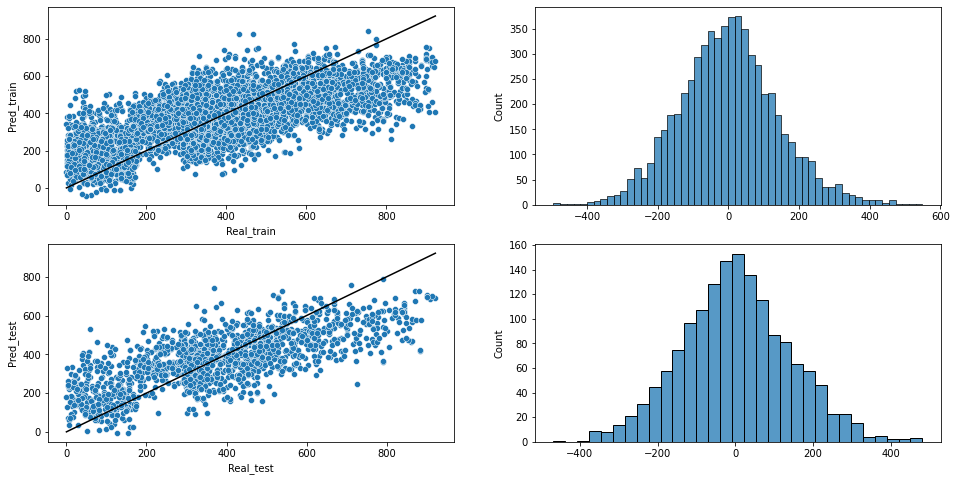

In [47]:
lr_perf_plots(df_train_lr, df_test_lr)

Overall our model is not great, it tends to overestimate on the lower values and underestimate on the higher ones, but at least there is a linear relationship between the values, as shown in the scatter plot and the distribution of the errors is quite Gaussian.

## Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

### Defining a list of models to train:

For this purpose we will be training the following models:

- KNeighbors Regressor
- Linear Regression Model
- MLP Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

model1 = LinearRegression()
model2 = KNeighborsRegressor()
model3 = MLPRegressor(max_iter = 4000)

list_of_models = [(model1,"Linear_model"),(model2,"K-NN"), (model3,"MLPRegressor")]

### Defining the function that trains the models:

In [49]:
def train_models(list_of_models, X_train, X_test, y_train, y_test):
    
    '''
    This function does the following things:
    1. Trains and returns models mentioned in a list
    2. Returns a list of arrays with the predictions of each model on for both Train and Test set
    3. Returns a list with R2 Scores for both Train and Test set
    4. Stores the models in .pkl files
    '''
    
    import pickle
  
    train_preds = []
    test_preds  = []
    train_r2_scores = []
    test_r2_scores = []
        
    for model in list_of_models:
        
        model[0].fit(X_train, y_train.values.ravel())
        filename = model[1] + ".pkl"
        
        with open(filename,"wb") as file:
            pickle.dump(model[0],file)
            
        
        y_pred_train = model[0].predict(X_train)
        y_pred_test  = model[0].predict(X_test) 
        
        train_preds.append( y_pred_train )
        test_preds.append( y_pred_test )
        
        train_r2_scores.append( r2_score(y_train.values.ravel(), y_pred_train ) )
        test_r2_scores.append( r2_score(y_test.values.ravel(), y_pred_test ) )
                                                              
    
    return list_of_models, train_preds, test_preds, train_r2_scores, test_r2_scores

In [50]:
list_of_models, train_preds, test_preds, train_r2_scores, test_r2_scores = train_models(list_of_models, X_train_final, X_test_final, y_train, y_test)

### Assessing the peformance of all models to find out which one performed best

In [62]:
def reg_score_comparison(train_r2_scores, test_r2_scores, model_list):
    
    for i in range(0, len(train_r2_scores)):
        
        R2_train = train_r2_scores[i]
        model_train = model_list[i][1]
        
        print('The R2 score of the', model_train, ' on Train set is: ', round(R2_train,2))
        
        i +=1
    
    print('---------------------------------------------------------')
    
    for j in range(0, len(test_r2_scores)):
        
        R2_test = test_r2_scores[j]
        model_test = model_list[j][1]
        
        print('The R2 score of the', model_test, 'on Test set is: ', round(R2_test,2))
        
        j +=1
    
    

In [63]:
reg_score_comparison(train_r2_scores, test_r2_scores, list_of_models)

The R2 score of the Linear_model  on Train set is:  0.51
The R2 score of the K-NN  on Train set is:  0.55
The R2 score of the MLPRegressor  on Train set is:  0.83
---------------------------------------------------------
The R2 score of the Linear_model on Test set is:  0.52
The R2 score of the K-NN on Test set is:  0.31
The R2 score of the MLPRegressor on Test set is:  0.83


As we can see, based on its R2 score, the model that performs the best is the MLP Regressor, overfitting is not present in any model.